In [20]:
import matplotlib as mpl

import matplotlib.pyplot as plt 

#produce static images in the entire notebook
%matplotlib inline 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('College.csv')
df.head()

,School Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
selected_columns = df[["School Name","Private","Grad.Rate"]]
new_df = selected_columns.copy()
new_df.head()

,School Name,Private,Grad.Rate
0,Abilene Christian University,Yes,60
1,Adelphi University,Yes,56
2,Adrian College,Yes,54
3,Agnes Scott College,Yes,59
4,Alaska Pacific University,Yes,15


In [6]:
def checkEmpty(df, col):
    count = 0
    for i in range(df.shape[0]):
        if df[col].isna()[0]:
            count +=1
    return count
    
print(removeEmpty(new_df, "School Name"))
print(removeEmpty(new_df, "Private"))
print(removeEmpty(new_df, "Grad.Rate"))

0
0
0


In [18]:
grouped = new_df.groupby('Private')
publicMid = grouped.get_group('No')['Grad.Rate'].median()
privateMid = grouped.get_group('Yes')['Grad.Rate'].median()
print(publicMid)
print(privateMid)

55.0
69.0


Text(0.5,1,'Graduation Rates in Public Schools vs. Private Schools')

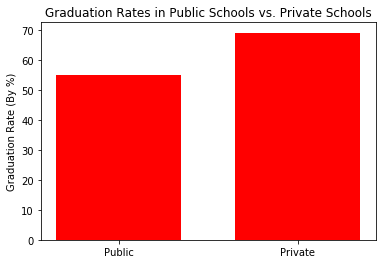

In [29]:
width =0.7

labels = ['Public', 'Private']
x = np.arange(len(labels))
plt.ylabel('Graduation Rate (By %)')
plt.xticks([0, 1], labels);

plt.bar(x, (publicMid, privateMid), width=width, color='red')
plt.title('Graduation Rates in Public Schools vs. Private Schools')

In [39]:

pubDf = grouped.get_group('No')
privDf = grouped.get_group('Yes')

#Public 
stcr = pubDf['Grad.Rate'].astype(float)
iqr = stcr.quantile(0.75) - stcr.quantile(0.25)
min = stcr.quantile(0.25) - (1.5 * iqr)
max = stcr.quantile(0.75) + (1.5 * iqr)

min_df = pubDf.loc[pubDf['Grad.Rate'].astype(float) < min]
max_df = pubDf.loc[pubDf['Grad.Rate'].astype(float) > max]
outliers = pd.concat([min_df, max_df])

if(len(outliers) == 0):
    print("There are 0 Public Graduation Rate Outliers")
else:
    print("There are %d Public Graduation Rate Outlier(s)" % len(outliers))
    print(outliers.head(len(outliers)))
    
print()
#Private 
stcr = privDf['Grad.Rate'].astype(float)
iqr = stcr.quantile(0.75) - stcr.quantile(0.25)
min = stcr.quantile(0.25) - (1.5 * iqr)
max = stcr.quantile(0.75) + (1.5 * iqr)

min_df = privDf.loc[privDf['Grad.Rate'].astype(float) < min]
max_df = privDf.loc[privDf['Grad.Rate'].astype(float) > max]
outliers = pd.concat([min_df, max_df])

if(len(outliers) == 0):
    print("There are 0 Private Graduation Rate Outliers")
else:
    print("There are %d Private Graduation Rate Outlier(s)" % len(outliers))
    print(outliers.head(len(outliers)))

There are 4 Public Graduation Rate Outlier(s)
                         School Name Private  Grad.Rate
585        Texas Southern University      No         10
279         James Madison University      No         98
377  Missouri Southern State College      No        100
693           University of Virginia      No         95

There are 8 Private Graduation Rate Outlier(s)
                   School Name Private  Grad.Rate
4    Alaska Pacific University     Yes         15
66      Brewton-Parker College     Yes         18
113            Claflin College     Yes         21
198             Ferrum College     Yes         22
264           Huron University     Yes         21
384  Montreat-Anderson College     Yes         15
394  Mount Saint Clare College     Yes         21
95           Cazenovia College     Yes        118
